## Objective :
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.


## Buisness and Data Understanding :
### There are two most important issue on which Spark Fund company has their focus for investment:
1. Company wants to invest within range of 5 to 15 million USD per round investment.
2. For the ease of communication company wants to invest only in those countries in which English is one of the official language.

## Buisness Objective:
The objective is to identify the best sectors,countries and a suitable investment type for making investment.The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

### Checkpoint 1

In [1]:
# importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

### Loading the data 

In [4]:
# loading the companies data:
companies=pd.read_csv("Companies.txt",sep="\t",encoding="ISO-8859-1")
print(type(companies))
companies.head()

<class 'pandas.core.frame.DataFrame'>


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
# Loading the Rounds2 data
rounds2=pd.read_csv("Rounds2.csv",encoding="ISO-8859-1")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
# checking about companies details 
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Buildcircle,Karma,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [7]:
# how many unique companies are present in companies can be found using permalink since this is unique id for identifing each row uniquely
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [8]:
#there might be chances that company permalink written in different cases 
len(companies['permalink'].unique())

66368

In [9]:
# after converting into lower case 
companies['permalink']=companies['permalink'].str.lower()
len(companies['permalink'].unique())

66368

In [10]:
# for confirming with lower case
len(companies['permalink'].str.lower().unique())

66368

In [11]:
'''In all cases we got the same number of unique companies 66368'''


'In all cases we got the same number of unique companies 66368'

In [12]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [13]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [14]:
'''for finding the unique number of companies in rounds2 we can use company_permalink attribute'''
len(rounds2['company_permalink'].unique())

90247

In [15]:
'''For getting the exact number we have to convert the company_permalink into lowercase'''
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()

In [16]:
len(rounds2['company_permalink'].unique())

66370

In [17]:
len(rounds2['company_permalink'].unique())

66370

In [18]:
'''we got the unique companies that is 66370'''

'we got the unique companies that is 66370'

In [19]:
'''For comparing companies in rounds2 and companies data'''
check=rounds2['company_permalink'].isin(companies['permalink'])

In [20]:
print(check)
'''to check are all unique in check if yes then all companies in rounds2 must be in companies'''
print(check.unique())

0         True
1         True
2         True
3         True
4         True
          ... 
114944    True
114945    True
114946    True
114947    True
114948    True
Name: company_permalink, Length: 114949, dtype: bool
[ True False]


In [21]:
'''another way to check out'''
temp1 = pd.DataFrame(rounds2.company_permalink.unique())
temp2 = pd.DataFrame(companies.permalink.unique())
temp2.equals(temp1)

False

In [22]:
diff_companies=len(rounds2['company_permalink'].unique())-len(companies['permalink'].unique())
print(diff_companies)

2


#### Data Cleaning Task 

In [30]:
# data cleaning for companies data 
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [37]:
companies=companies.drop('homepage_url',axis=1)

In [35]:
len(companies.index)

66368

In [39]:
companies=companies.drop('region',axis=1)

In [40]:
companies=companies.drop('city',axis=1)

In [38]:
companies=companies.drop('founded_at',axis=1)

In [41]:
companies=companies.drop('state_code',axis=1)

In [42]:
# data cleaning for rounds2 data
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [43]:
len(rounds2.index)

114949

In [44]:
rounds2=rounds2.drop('funding_round_code',axis=1)

In [45]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [46]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 5 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(4)
memory usage: 4.4+ MB


In [47]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [48]:
# merging of two data frame to form  master_frame
master_frame = pd.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')
master_frame.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [49]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 10 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
dtypes: float64(1), object(9)
memory usage: 9.6+ MB


In [50]:
master_frame.shape

(114949, 10)

In [51]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           8
category_list               3414
status                         7
country_code                8678
dtype: int64

In [52]:
len(master_frame.index)

114949

In [54]:
# Required data cleaning after merging of dataframe companies and rounds2
master_frame=master_frame.drop(['funding_round_permalink','permalink'],axis=1)

In [55]:
master_frame.shape

(114949, 8)

In [56]:
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
funded_at                 0
raised_amount_usd     19990
name                      8
category_list          3414
status                    7
country_code           8678
dtype: int64

In [59]:
master_frame=master_frame.drop('funded_at',axis=1)

In [60]:
master_frame.shape

(114949, 7)

In [61]:
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
raised_amount_usd     19990
name                      8
category_list          3414
status                    7
country_code           8678
dtype: int64

In [62]:
master_frame=master_frame.drop('status',axis=1)

In [63]:
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
raised_amount_usd     19990
name                      8
category_list          3414
country_code           8678
dtype: int64

In [64]:
# finding the percentage of after deleting various coloumn
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.01
category_list          2.97
country_code           7.55
dtype: float64


In [69]:
#according to the given problem analysis we have to keep raised_amount_usd as target variable so we can delete 
master_frame=master_frame[~(master_frame['raised_amount_usd'].isnull())]

In [70]:
# for keeping current master_frame
master_frame_copy=master_frame

In [71]:
#according to the given problem analysis we have to keep raised_amount_usd as target variable so we can delete 
master_frame=master_frame[~(master_frame['country_code'].isnull())]

In [72]:
# for keeping current master_frame
master_frame_copy1=master_frame

In [73]:
master_frame=master_frame[~(master_frame['category_list'].isnull())]

In [74]:
# for keeping current master_frame
master_frame_copy2=master_frame

In [75]:
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
country_code          0.0
dtype: float64


In [76]:
#Percentage of retained rows
print(100*(len(master_frame.index)/114949))

77.01589400516751


In [77]:
master_frame.shape

(88529, 6)

### Funding Type Analysis:

#### Checkpoint 2

1. Target is to retrieve the rows with only four types of investment(venture,seed,private_equity and angel)

In [80]:
### tring to observe number of investment for each type of funding
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [81]:
master_frame_copy3=master_frame

In [82]:
master_frame= master_frame[master_frame['funding_round_type'].isin(['venture','seed','angel','private_equity'])]

In [83]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN


#### Task 2.2 is to find out the mean of each of the four funding_type
1. average funding amount of venture type
2. average funding amount of seed type
3. average funding amount of angel type 
4. average funding amount of private_equity

In [84]:
#as per the problem requirement converting  $ to million $.
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000

C:\Users\NCE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.000000,#fame,Media,IND
2,/organization/-qounter,seed,0.700000,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2.000000,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,0.043360,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,CAN


In [87]:
## finding average invetment for each type of funding and storing them in new variable
master_frame_copy4=master_frame
round(master_frame.groupby('funding_round_type').raised_amount_usd.mean(), 2)

funding_round_type
angel              0.97
private_equity    73.94
seed               0.75
venture           11.72
Name: raised_amount_usd, dtype: float64

In [88]:
## from above we can easily find out that only venture type has average investment betwwen 5 to 15 million USD
master_frame = master_frame[master_frame['funding_round_type'] == 'venture'] 

In [89]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.000000,#fame,Media,IND
4,/organization/0-6-com,venture,2.000000,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,venture,20.000000,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1.700000,H2O.ai,Analytics,USA


In [93]:
### from the above analysis we can find out that 
#### under funding_round_type only venture is present so only one type of data is available
master_frame=master_frame.drop('funding_round_type',axis=1)

KeyError: "['funding_round_type'] not found in axis"

### Country analysis:
#### Checkpoint 3:
1.Task 3.1 finding out top9 countries 

2.Task 3.2 creation of top9 dataframe

In [94]:
# displaying all the top  9 countries task3.1
master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(15)

country_code
USA    420068.029342
CHN     39338.918773
GBR     20072.813004
IND     14261.508718
CAN      9482.217668
FRA      7226.851352
ISR      6854.350477
DEU      6306.921981
JPN      3167.647127
SWE      3145.856571
NLD      2903.875785
CHE      2801.560264
SGP      2793.917856
ESP      1827.622434
BRA      1785.817890
Name: raised_amount_usd, dtype: float64

In [95]:
# creation of dataframe top9 
top9 = master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')

In [97]:
top9 = top9.sort_values(by = 'raised_amount_usd', ascending = False)

In [98]:
top9.head(9)

,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7226.851352
ISR,6854.350477
DEU,6306.921981
JPN,3167.647127


In [99]:
top9=top9.head(9)

In [100]:
print(top9)

              raised_amount_usd
country_code                   
USA               420068.029342
CHN                39338.918773
GBR                20072.813004
IND                14261.508718
CAN                 9482.217668
FRA                 7226.851352
ISR                 6854.350477
DEU                 6306.921981
JPN                 3167.647127


#### last task in checkpoint is to analyse the top3 english speaking country that can be find out by analysing the  english speaking country table

In [101]:
master_frame= master_frame[master_frame['country_code'].isin(['USA','GBR','IND'])]

### Sector Analysis 
##### Checkpoint 4:
1. Task 4.1 Extract the primary sector for each category

Extract the primary sector value into category_list column. According to the business rule the first string before the vertical bar will be considered the primary sector.

In [103]:
# Primary sector extrction
def retain_primary_secor(value):
    values = value.split('|')
    if len(values) > 1:
        return values[0]
    else:
        return value

In [105]:
master_frame['primary_sector'] = master_frame['category_list'].apply(retain_primary_secor)

C:\Users\NCE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
master_frame['category_list']=master_frame['category_list'].apply(retain_primary_secor)

C:\Users\NCE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
#### Reading mapping data
mapping=pd.read_csv('mapping.csv',encoding="ISO-8859-1")

In [108]:
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)

In [109]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [112]:
#### finding out the main sector use pivot table 
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 

In [113]:
mapping.head(60)

,category_list,variable,value
0,NaN,Manufacturing,0
1,3D,Manufacturing,1
2,3D Printing,Manufacturing,1
3,3D Technology,Manufacturing,1
4,Accounting,Manufacturing,0
5,Active Lifestyle,Manufacturing,0
6,Ad Targeting,Manufacturing,0
7,Advanced Materials,Manufacturing,1
8,Adventure Travel,Manufacturing,0
9,Advertising,Manufacturing,0


In [114]:
mapping = mapping[~(mapping.value == 0)]

In [115]:
mapping.head(60)

,category_list,variable,value
1,3D,Manufacturing,1
2,3D Printing,Manufacturing,1
3,3D Technology,Manufacturing,1
7,Advanced Materials,Manufacturing,1
15,Agriculture,Manufacturing,1
34,Architecture,Manufacturing,1
55,Batteries,Manufacturing,1
78,Building Products,Manufacturing,1
104,Civil Engineers,Manufacturing,1
127,Communications Hardware,Manufacturing,1


In [116]:
mapping = mapping.drop('value', axis = 1)

In [117]:
mapping.head(60)

,category_list,variable
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing
34,Architecture,Manufacturing
55,Batteries,Manufacturing
78,Building Products,Manufacturing
104,Civil Engineers,Manufacturing
127,Communications Hardware,Manufacturing


In [118]:
mapping = mapping.rename(columns = {"variable":"main_sector"})

In [119]:
mapping.head(60)

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing
34,Architecture,Manufacturing
55,Batteries,Manufacturing
78,Building Products,Manufacturing
104,Civil Engineers,Manufacturing
127,Communications Hardware,Manufacturing


In [120]:
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')

In [121]:
master_frame.head(40)

,company_permalink,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
0,/organization/-fame,10.000000,#fame,Media,IND,Media,Entertainment
1,/organization/0xdata,20.000000,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,1.700000,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,8.900000,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,5.000000,1 Mainstream,Apps,USA,Apps,"News, Search and Messaging"
5,/organization/10-minutes-with,4.000000,10 Minutes With,Education,GBR,Education,Others
6,/organization/1000memories,2.520000,1000memories,Curated Web,USA,Curated Web,"News, Search and Messaging"
7,/organization/1000museums-com,0.265940,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"
8,/organization/1000museums-com,2.906832,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"
9,/organization/1000museums-com,1.500000,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"


In [122]:
#### Displaying the primary sector without main_sector
print(master_frame[master_frame.main_sector.isnull()].primary_sector.unique())

['Nanotechnology' 'Natural Gas Uses' 'Natural Language Processing'
 'Enterprise 2.0' 'Adaptive Equipment' 'Racing' 'Specialty Retail'
 'Biotechnology and Semiconductor' 'Rapidly Expanding' 'Navigation'
 'Product Search' 'GreenTech' 'Retirement']


In [123]:
#### retrieving all the rows(category_list) having main_sector
master_frame_copy5=master_frame


In [125]:
master_frame=master_frame_copy5

In [127]:
master_frame.isnull().sum()

company_permalink      0
raised_amount_usd      0
name                   0
category_list          0
country_code           0
primary_sector         0
main_sector          165
dtype: int64

In [124]:
master_frame.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
0,/organization/-fame,10.0,#fame,Media,IND,Media,Entertainment
1,/organization/0xdata,20.0,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,1.7,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,8.9,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,5.0,1 Mainstream,Apps,USA,Apps,"News, Search and Messaging"


In [128]:
master_frame = master_frame[~(master_frame.main_sector.isnull())]

In [129]:
len(master_frame.index)

38638

### Sector Analysis 2
####  Checkpoint 5
1. Task 5.1 Create DataFrames D1, D2, D3 based on three countries
Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

      1.1 All the columns of the master_frame along with the primary sector and the main sector
      
      1.2 The total number (or count) of investments for each main sector in a separate column
      
      1.3 The total amount invested in each main sector in a separate column
 

In [130]:
#### D1 dataframe creation
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]

In [131]:
D1.head(15)

,company_permalink,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
3,/organization/0xdata,8.900000,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,5.000000,1 Mainstream,Apps,USA,Apps,"News, Search and Messaging"
17,/organization/128-technology,11.999347,128 Technology,Service Providers,USA,Service Providers,Others
20,/organization/1366-technologies,15.000000,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing
21,/organization/1366-technologies,5.000000,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing
22,/organization/1366-technologies,5.150000,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing
23,/organization/1366-technologies,12.400000,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing
24,/organization/1366-technologies,6.000000,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing
29,/organization/170-systems,14.000000,170 Systems,Software,USA,Software,Others
31,/organization/17zuoye,5.000000,17zuoye,Education,USA,Education,Others


In [132]:
D1_group = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount_invested','count' : 'Total_investment_count'})

In [134]:
D1_group.head()

raised_amount_usd                       
                           Total_amount_invested Total_investment_count
main_sector                                                            
Automotive & Sports                  1454.104361                    167
Cleantech / Semiconductors          21206.628192                   2300
Entertainment                        5099.197982                    591
Health                               8211.859357                    909
Manufacturing                        7258.553378                    799

In [135]:
D1.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
3,/organization/0xdata,8.900000,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,5.000000,1 Mainstream,Apps,USA,Apps,"News, Search and Messaging"
17,/organization/128-technology,11.999347,128 Technology,Service Providers,USA,Service Providers,Others
20,/organization/1366-technologies,15.000000,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing
21,/organization/1366-technologies,5.000000,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing


In [136]:
D1 = D1.merge(D1_group, how='left', on ='main_sector')

C:\Users\NCE\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [137]:
D1.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,"(raised_amount_usd, Total_amount_invested)","(raised_amount_usd, Total_investment_count)"
0,/organization/0xdata,8.900000,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising",23807.376964,2714
1,/organization/1-mainstream,5.000000,1 Mainstream,Apps,USA,Apps,"News, Search and Messaging",13959.567428,1582
2,/organization/128-technology,11.999347,128 Technology,Service Providers,USA,Service Providers,Others,26321.007002,2950
3,/organization/1366-technologies,15.000000,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing,7258.553378,799
4,/organization/1366-technologies,5.000000,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing,7258.553378,799


In [151]:
len(D1.index)

12012

In [155]:
D1.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,167,1454.104361
Cleantech / Semiconductors,2300,21206.628192
Entertainment,591,5099.197982
Health,909,8211.859357
Manufacturing,799,7258.553378
"News, Search and Messaging",1582,13959.567428
Others,2950,26321.007002
"Social, Finance, Analytics, Advertising",2714,23807.376964


In [156]:
# finding the best top sectors in USA
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [159]:
# for finding the top company in best sectors
D1[D1['main_sector'] == "Others" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(15)

company_permalink
/organization/virtustream               64.300000
/organization/capella                   54.968051
/organization/airtight-networks         54.201907
/organization/decarta                   52.100000
/organization/black-duck-software       51.000000
/organization/approva                   50.100000
/organization/five9                     49.600000
/organization/bit9                      48.433533
/organization/aryaka-networks           48.166500
/organization/bti-systems               48.000000
/organization/change-healthcare         47.000000
/organization/zilliant                  45.600000
/organization/vormetric                 45.000000
/organization/redfin                    44.800000
/organization/elemental-technologies    44.100000
Name: raised_amount_usd, dtype: float64

In [160]:
D1[D1['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/organization/shotspotter    67.933006
/organization/demandbase     63.000000
/organization/intacct        61.800000
/organization/netbase        60.600000
/organization/lotame         59.700000
Name: raised_amount_usd, dtype: float64

In [226]:
D1[D1['main_sector'] == "Cleantech / Semiconductors" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/organization/biodesix         75.300000
/organization/tigo-energy      68.739496
/organization/forsight-labs    61.300001
/organization/rheonix          56.124758
/organization/scienergy        55.375423
Name: raised_amount_usd, dtype: float64

In [138]:
##### For creating dataframe D2
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]

In [139]:
D2_group = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount_invested','count' : 'Total_investment_count'})

In [140]:
D2.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
108,/organization/365scores,5.500000,365Scores,Android,GBR,Android,"Social, Finance, Analytics, Advertising"
232,/organization/7digital,8.468328,7digital,Content Creators,GBR,Content Creators,Entertainment
233,/organization/7digital,10.000000,7digital,Content Creators,GBR,Content Creators,Entertainment
256,/organization/90min,15.000000,90min,Media,GBR,Media,Entertainment
257,/organization/90min,5.800000,90min,Media,GBR,Media,Entertainment


In [141]:
D2 = D2.merge(D2_group, how='left', on ='main_sector')

In [142]:
D2.head(15)

,company_permalink,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,"(raised_amount_usd, Total_amount_invested)","(raised_amount_usd, Total_investment_count)"
0,/organization/365scores,5.500000,365Scores,Android,GBR,Android,"Social, Finance, Analytics, Advertising",1089.404014,133
1,/organization/7digital,8.468328,7digital,Content Creators,GBR,Content Creators,Entertainment,482.784687,56
2,/organization/7digital,10.000000,7digital,Content Creators,GBR,Content Creators,Entertainment,482.784687,56
3,/organization/90min,15.000000,90min,Media,GBR,Media,Entertainment,482.784687,56
4,/organization/90min,5.800000,90min,Media,GBR,Media,Entertainment,482.784687,56
5,/organization/abcodia,8.259067,Abcodia,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors,1150.139665,128
6,/organization/acacia-pharma,10.000000,Acacia Pharma,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors,1150.139665,128
7,/organization/acal-energy,9.910333,ACAL Energy,Clean Technology,GBR,Clean Technology,Cleantech / Semiconductors,1150.139665,128
8,/organization/acal-enterprise-solutions,10.720178,Acal Enterprise Solutions,Information Technology,GBR,Information Technology,"Social, Finance, Analytics, Advertising",1089.404014,133
9,/organization/accent-media-ltd,8.300000,Accent Media Limited,Domains,GBR,Domains,"News, Search and Messaging",615.746235,73


In [150]:
len(D2.index)

619

In [161]:
# finding the best top sectors in GBR
D2.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,16,167.051565
Cleantech / Semiconductors,128,1150.139665
Entertainment,56,482.784687
Health,24,214.537510
Manufacturing,42,361.940335
"News, Search and Messaging",73,615.746235
Others,147,1283.624289
"Social, Finance, Analytics, Advertising",133,1089.404014


In [162]:
# for finding the best company in best sector
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [164]:
D2[D2['main_sector'] == "Others" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(15)

company_permalink
/organization/electric-cloud                 37.000000
/organization/sensage                        36.250000
/organization/enigmatic                      32.500000
/organization/silverrail-technologies        29.000000
/organization/opencloud                      27.972766
/organization/myoptique-group                27.694613
/organization/notonthehighstreet             26.900000
/organization/acs-clothing                   26.239014
/organization/tribold                        26.000000
/organization/ip-access                      25.000000
/organization/eglue-business-technologies    22.000000
/organization/alfresco                       21.000000
/organization/aepona                         20.000000
/organization/lyst                           19.000000
/organization/njini                          18.000000
Name: raised_amount_usd, dtype: float64

In [165]:
D2[D2['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(15)

company_permalink
/organization/celltick-technologies    37.500000
/organization/mythings                 34.000000
/organization/zopa                     32.900000
/organization/imagini                  28.550000
/organization/marketinvoice            25.553007
/organization/sumup                    24.293649
/organization/amplience                24.200000
/organization/garlik                   22.350000
/organization/sportpursuit             22.024487
/organization/victor                   21.500000
/organization/opengamma                21.000000
/organization/kantox                   19.646334
/organization/troux-technologies       17.850000
/organization/neul                     17.800000
/organization/livebookings             16.500000
Name: raised_amount_usd, dtype: float64

In [227]:
D2[D2['main_sector'] == "Cleantech / Semiconductors" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(15)

company_permalink
/organization/eusa-pharma                                                      35.600000
/organization/horizon-discovery                                                31.353719
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    29.132906
/organization/elixent                                                          25.000000
/organization/takeda-cambridge                                                 22.340000
/organization/immune-targeting-systems                                         20.320961
/organization/plaxica                                                          19.940192
/organization/i2o-water                                                        19.491529
/organization/xention                                                          19.051289
/organization/oxford-photovoltaics                                             18.820357
/organization/autifony-therapeutics                                            17.836350
/or

In [143]:
### for creating dataframe D3
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]

In [144]:
D3_group = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount_invested','count' : 'Total_investment_count'})

In [145]:
D3 = D3.merge(D3_group, how='left', on ='main_sector')

In [146]:
D3.head(15)

,company_permalink,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector,"(raised_amount_usd, Total_amount_invested)","(raised_amount_usd, Total_investment_count)"
0,/organization/-fame,10.000000,#fame,Media,IND,Media,Entertainment,280.830000,33
1,/organization/21diamonds-india,6.369507,21Diamonds,E-Commerce,IND,E-Commerce,Others,1013.409507,110
2,/organization/a-little-world,6.410000,A LITTLE WORLD,Finance,IND,Finance,"Social, Finance, Analytics, Advertising",550.549550,60
3,/organization/adlabs-imagica,8.180000,Adlabs Imagica,Entertainment,IND,Entertainment,Entertainment,280.830000,33
4,/organization/agile,5.740000,Agile,Finance,IND,Finance,"Social, Finance, Analytics, Advertising",550.549550,60
5,/organization/akosha,5.000000,Akosha,Consumer Internet,IND,Consumer Internet,"Social, Finance, Analytics, Advertising",550.549550,60
6,/organization/amagi-media-labs,5.500000,Amagi Media Labs,Advertising,IND,Advertising,"Social, Finance, Analytics, Advertising",550.549550,60
7,/organization/ameyo,5.000000,Ameyo,Software,IND,Software,Others,1013.409507,110
8,/organization/ani-technologies,5.000000,Ola,Automotive,IND,Automotive,Automotive & Sports,136.900000,13
9,/organization/annapurna-microfinace,5.000000,Annapurna Microfinace,Finance,IND,Finance,"Social, Finance, Analytics, Advertising",550.549550,60


In [149]:
len(D3.index)

328

In [166]:
D3.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,13,136.900000
Cleantech / Semiconductors,20,165.380000
Entertainment,33,280.830000
Health,19,167.740000
Manufacturing,21,200.900000
"News, Search and Messaging",52,433.834545
Others,110,1013.409507
"Social, Finance, Analytics, Advertising",60,550.549550


In [167]:
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [169]:
D3[D3['main_sector'] == "Others" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(15)

company_permalink
/organization/firstcry-com                                                              39.0
/organization/myntra                                                                    38.0
/organization/commonfloor                                                               32.9
/organization/pepperfry-com                                                             28.0
/organization/itzcash-card-ltd                                                          25.0
/organization/nxtgen-data-center-cloud-services                                         22.3
/organization/maharana-infrastructure-and-professional-services-private-limited-mips    21.6
/organization/caratlane                                                                 21.0
/organization/comat-technologies                                                        21.0
/organization/limeroad                                                                  20.0
/organization/roposo                                

In [170]:
D3[D3['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(15)

company_permalink
/organization/manthan-systems                                 50.70000
/organization/komli-media                                     28.00000
/organization/shopclues-com                                   25.00000
/organization/intarvo                                         21.90000
/organization/grameen-financial-services                      21.55605
/organization/bankbazaar                                      19.00000
/organization/microland                                       18.30000
/organization/eka-software-solutions                          16.00000
/organization/qyuki                                           15.40000
/organization/financial-information-network-operations-pvt    15.00000
/organization/travelguru                                      15.00000
/organization/shiram-credit                                   15.00000
/organization/apnaloan                                        15.00000
/organization/capital-float                                

In [229]:
D3[D3['main_sector'] == "News, Search and Messaging"].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(15)

company_permalink
/organization/gupshup-technology-india-pvt-ltd    33.00
/organization/imimobile                           23.00
/organization/sms-gupshup                         22.00
/organization/hike                                21.00
/organization/roadrunnr                           21.00
/organization/matrimony-com                       20.40
/organization/guruji                              15.00
/organization/bluestone-com                       15.00
/organization/mobile2win-india                    15.00
/organization/quikr-india                         14.00
/organization/bharat-matrimony                    11.75
/organization/teledna                             10.49
/organization/babajob                             10.00
/organization/money-on-mobile                     10.00
/organization/fourinteractive                     10.00
Name: raised_amount_usd, dtype: float64

In [147]:
#Total number of investments (count) for USA,GBR and IND
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

12012
619
328


In [148]:
#Total amount of investment (USD) for USA,GBR and IND
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

107318.29
5365.23
2949.54


### Plotting
#### Checkpoint 6
1. A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [172]:
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("dark")

In [171]:
## master_frame_copy3 is master_frame copy for plotting the graph
master_frame_copy3.funding_round_type.value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

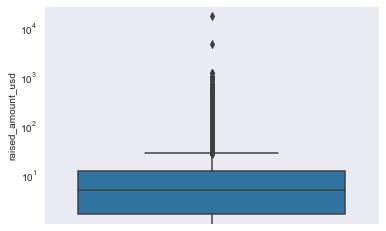

In [173]:
sns.boxplot(y=master_frame['raised_amount_usd'])
plt.yscale('log')
plt.show()

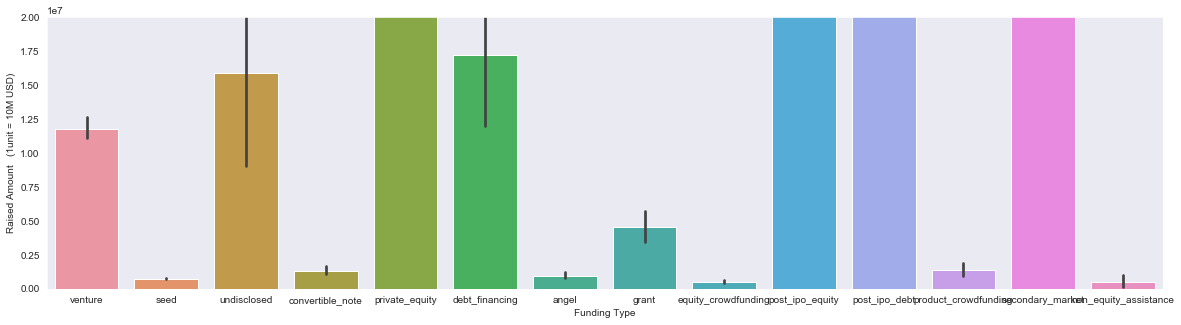

In [177]:
plt.figure(figsize=(20,5))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_copy3)
g.set_ylim(0, 20000000)
g.set(xlabel='Funding Type', ylabel='Raised Amount   (1unit = 10M USD)')
plt.show()

In [179]:
master_frame_copy6= master_frame_copy3[master_frame_copy3['funding_round_type'].isin(['venture','seed','angel','private_equity'])]

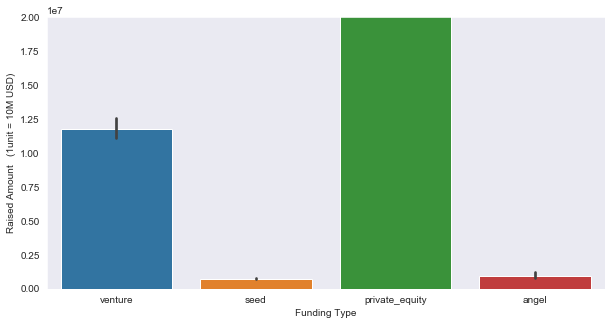

In [181]:
plt.figure(figsize=(10,5))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_copy6)
g.set_ylim(0, 20000000)
g.set(xlabel='Funding Type', ylabel='Raised Amount   (1unit = 10M USD)')
plt.show()

In [212]:
funding_types = master_frame_copy6.funding_round_type.value_counts()

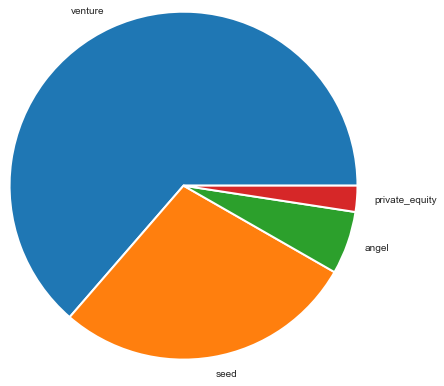

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64


In [217]:
# Create a pieplot
plt.pie(funding_types.values, labels=funding_types.index, radius=2.0, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })



plt.show()
print(funding_types)

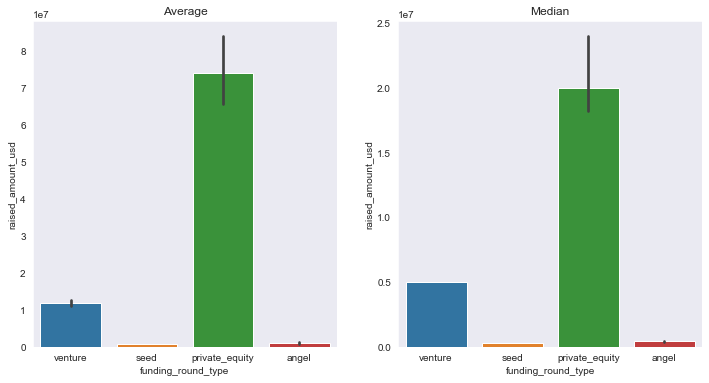

In [224]:
# Create 2 subplots for mean and median respectively

# increase figure size 
plt.figure(figsize=(15, 8))

# subplot 1:plotting mean
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_copy6,estimator=np.mean)
plt.title("Average")

# subplot 2: plotting median
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_copy6, estimator=np.median)
plt.title("Median")

plt.show()

In [183]:
top9.head(10)

,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7226.851352
ISR,6854.350477
DEU,6306.921981
JPN,3167.647127


In [189]:
top9_copy=top9

In [196]:
master_frame_copy3.head(15)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
6,/organization/01games-technology,undisclosed,41250.0,01Games Technology,Games,HKG
7,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
9,/organization/0xdata,seed,3000000.0,H2O.ai,Analytics,USA
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,USA
12,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,USA


In [197]:
master_frame.head(15)

,company_permalink,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
0,/organization/-fame,10.000000,#fame,Media,IND,Media,Entertainment
1,/organization/0xdata,20.000000,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,1.700000,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,8.900000,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,5.000000,1 Mainstream,Apps,USA,Apps,"News, Search and Messaging"
5,/organization/10-minutes-with,4.000000,10 Minutes With,Education,GBR,Education,Others
6,/organization/1000memories,2.520000,1000memories,Curated Web,USA,Curated Web,"News, Search and Messaging"
7,/organization/1000museums-com,0.265940,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"
8,/organization/1000museums-com,2.906832,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"
9,/organization/1000museums-com,1.500000,1000museums.com,Curated Web,USA,Curated Web,"News, Search and Messaging"


In [198]:
top9_copy1 = master_frame_copy3[master_frame_copy3['funding_round_type']=='venture'].groupby('country_code').sum().sort_values('raised_amount_usd', ascending=False).head(9)

In [199]:
top9_copy1.head(15)

,raised_amount_usd
country_code,
USA,4.200680e+11
CHN,3.933892e+10
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
FRA,7.226851e+09
ISR,6.854350e+09
DEU,6.306922e+09
JPN,3.167647e+09


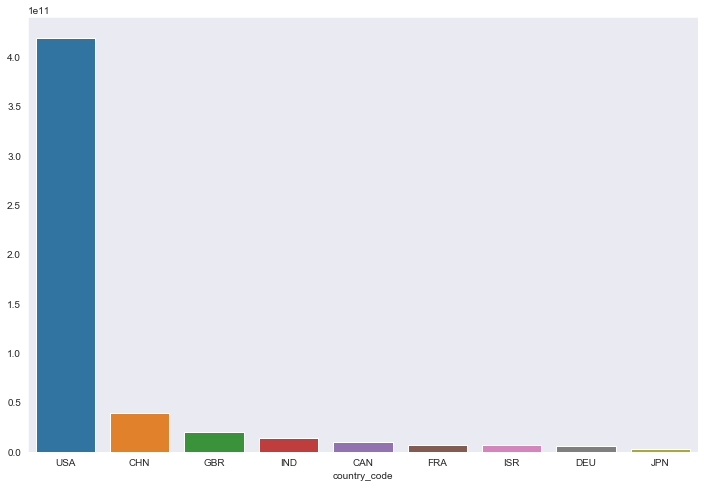

In [200]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top9_copy1.index, y=top9_copy1.values.ravel())
plt.show()

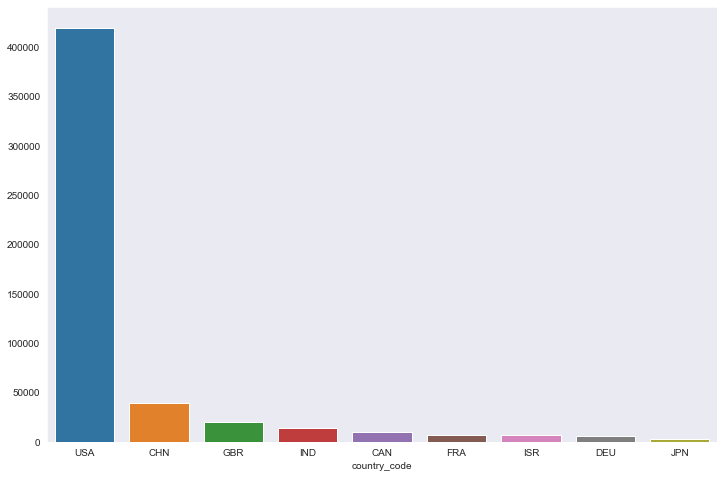

In [201]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top9.index, y=top9.values.ravel())
plt.show()

##### Task 3 
A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [202]:
top3_sec_of_top3_country=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [203]:
top3_sec_of_top3_country=top3_sec_of_top3_country.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)

In [204]:
top3_sec_of_top3_country.shape

(8372, 9)

In [206]:
top3_sec_of_top3_country=top3_sec_of_top3_country.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)

In [207]:
top3_sec_of_top3_country.shape

(8594, 9)

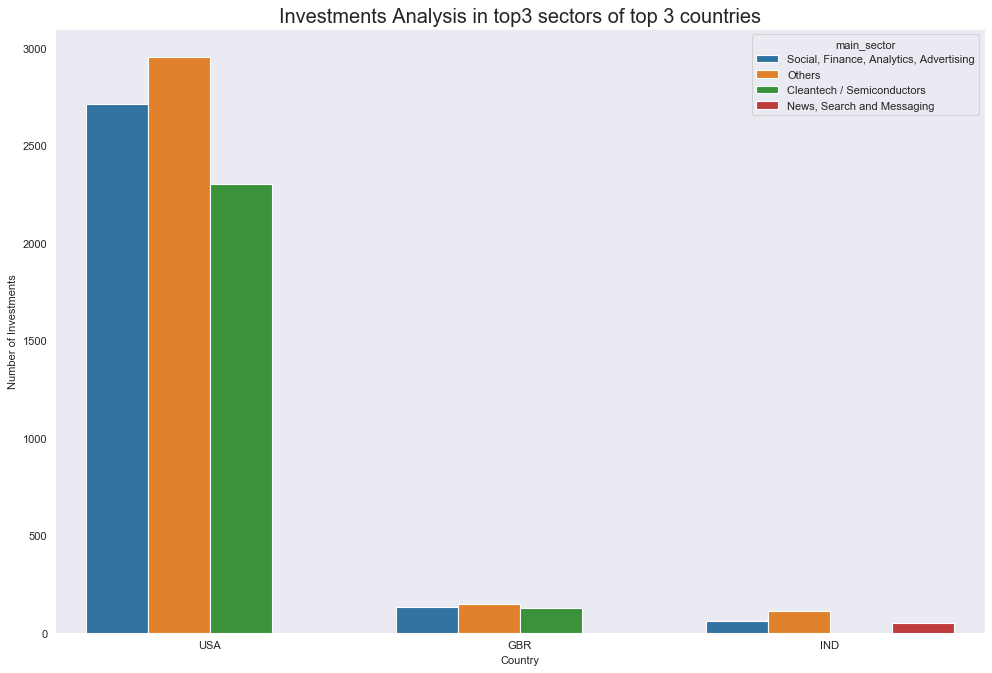

In [221]:
# adjusting the figure size
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=top3_sec_of_top3_country,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments Analysis in top3 sectors of top 3 countries',fontsize =18)
plt.show()